In [17]:
import tensorflow as tf
print(tf.__version__)


2.16.2


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings

warnings.filterwarnings('ignore')  # Corrected function name


In [19]:
train_path = "dataset/TRAIN"
test_path = "dataset/TEST"

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [21]:
# Visualization
x_data = []
y_data = []

for category in glob(train_path+"/*"):  # Loop through categories in the TRAIN folder
    for file in tqdm(glob(category+"/*")):  # Loop through files in each category
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # Convert to RGB
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])  # Extract label from folder name

data = pd.DataFrame({'image': x_data, "label": y_data})

100%|██████████| 12565/12565 [00:07<00:00, 1642.22it/s]


(22564, 2)


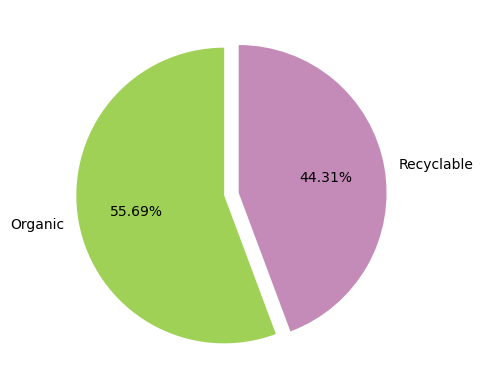

In [22]:
# Check the shape of the data
print(data.shape)

# Visualization of label distribution in the dataset
colors = ["#a0d157", "#c48bb8"]
plt.pie(data.label.value_counts(), labels=["Organic", "Recyclable"], autopct='%0.2f%%', colors=colors, startangle=90, explode=[0.05, 0.05])  # explode is optional
plt.show()